In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("C:/Users/user/titanic.csv", index_col = 0)
print (df)

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...       

In [3]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
df_1=df.drop('Cabin',axis=1)
df_1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


In [65]:
#Age 결측치를 중앙값으로 채우기
df_1['Age'].fillna(df_1['Age'].median(),inplace=True)
df_1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [68]:
df_2=df.drop('Cabin',axis=1)
df_2=df_2.dropna()
df_2 = df_2.astype({'Age' : 'int64'})

In [69]:
df_2.isnull().sum()
#age 그래프용 df_2

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [8]:
df_data=df_1.dropna()
df_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [9]:
df_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [10]:
S=df_data['Pclass']
S.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Pclass count')

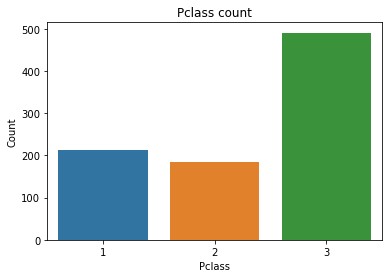

In [11]:
sns.countplot(data=df_data, x="Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass count")

In [12]:
S=df_data['Survived']
S.value_counts()

0    549
1    340
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived or Not')

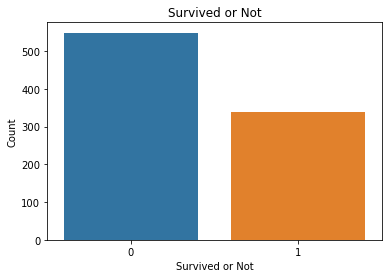

In [13]:
sns.countplot(data = df_data, x="Survived")
plt.xlabel("Survived or Not")
plt.ylabel("Count")
plt.title("Survived or Not")

In [14]:
df_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [15]:
df_data = df_data.replace({'male':0, 'female':1})

In [16]:
df_data = df_data.astype({'Sex' : 'int64'})

In [17]:
df_data = df_data.astype({'Age' : 'int64'})

In [18]:
df_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age           int64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

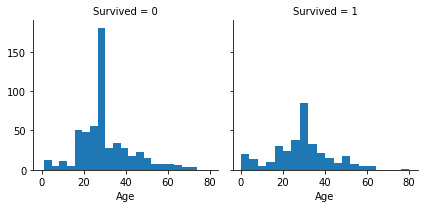

In [57]:
g = sns.FacetGrid(df_data, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin을 20개로 설정 

g.map(plt.hist, 'Age', bins=20)

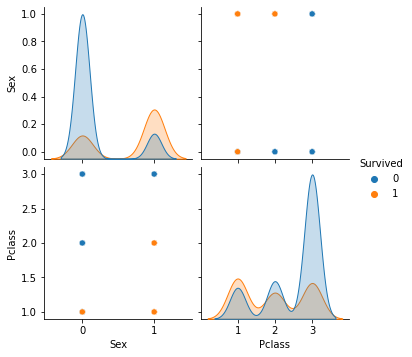

In [20]:
sns.pairplot(df_data,
             vars=['Sex', 'Pclass'],
            hue ='Survived')
plt.show()

Text(0.5, 1.0, 'Survived per Pclass')

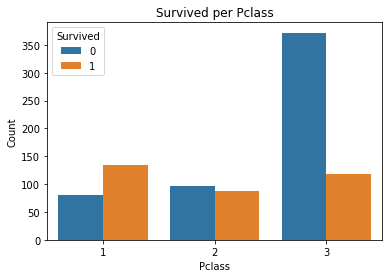

In [21]:
sns.countplot(data=df_data, x="Pclass", hue="Survived")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Survived per Pclass")

Text(0.5, 1.0, 'Survived per Sex')

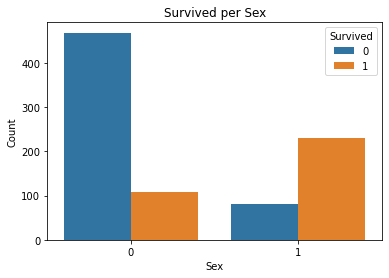

In [22]:
sns.countplot(data=df_data, x="Sex", hue="Survived")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survived per Sex")

Text(0.5, 1.0, 'Pclass per Sex')

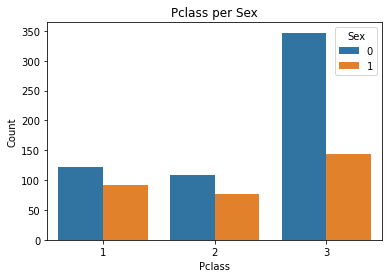

In [23]:
sns.countplot(data=df_data, x="Pclass", hue="Sex")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass per Sex")

Text(0.5, 1.0, 'Survived per Age')

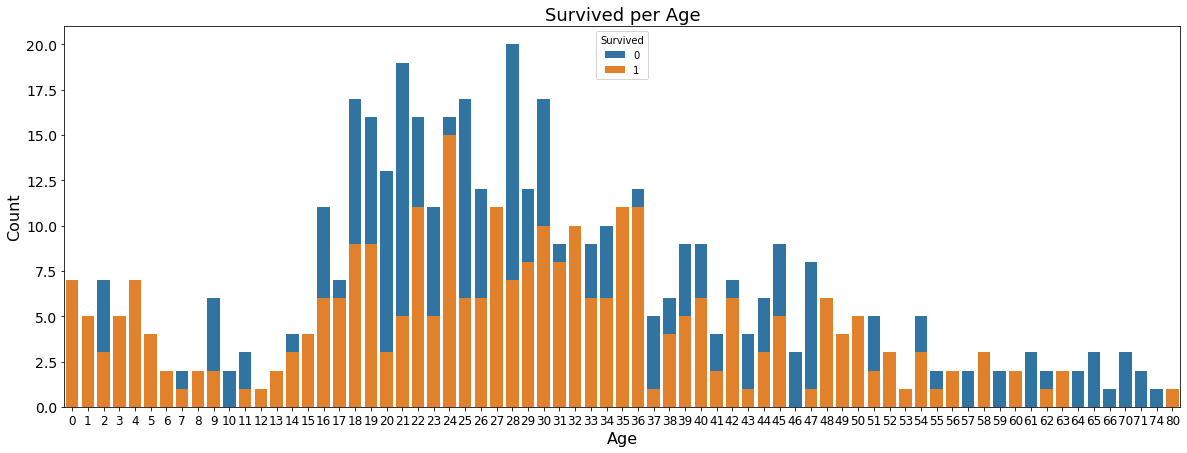

In [70]:
plt.figure(figsize=(20,7))
sns.countplot(data=df_2, x="Age", hue="Survived", dodge = False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Survived per Age", fontsize=18)

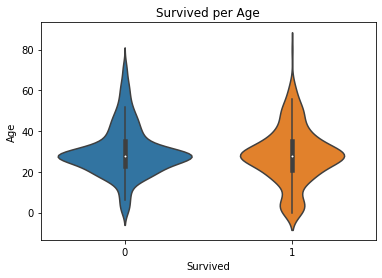

In [25]:
sns.violinplot(y="Age", x="Survived", data=df_data)
plt.title("Survived per Age")
plt.show()

In [28]:
#Y=df_data['Survived']

In [29]:
Y=df_data[['Survived']]
Y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [30]:
X=df_data.drop(['Survived', 'Name', 'Ticket'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22,1,0,7.2500,S
2,1,1,38,1,0,71.2833,C
3,3,1,26,0,0,7.9250,S
4,1,1,35,1,0,53.1000,S
5,3,0,35,0,0,8.0500,S


In [31]:
E=df_data['Embarked']
E.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
X = X.replace({'S':0, 'C':1, 'Q':2})
#S=0, C=1, Q=2

In [33]:
X = X.astype({'Embarked' : 'int64'})

In [34]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22,1,0,7.2500,0
2,1,1,38,1,0,71.2833,1
3,3,1,26,0,0,7.9250,0
4,1,1,35,1,0,53.1000,0
5,3,0,35,0,0,8.0500,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=5)

In [36]:
print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape : (711, 7)
y_train.shape : (711, 1)
X_test.shape: (178, 7)
y_test.shape: (178, 1)


In [93]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
cm_svm = confusion_matrix(y_test, pred_svm)
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.6629213483146067
[[102  17]
 [ 43  16]]


In [78]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, pred_lr)
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.848314606741573
[[106  13]
 [ 14  45]]


In [79]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, pred_dt)
print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8314606741573034
[[103  16]
 [ 14  45]]


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
cm_rf = confusion_matrix(y_test, pred)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.8370786516853933
[[107  12]
 [ 17  42]]


In [88]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
cm_nn = confusion_matrix(y_test, pred_nn)
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.8651685393258427
[[109  10]
 [ 14  45]]


In [42]:
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=4)

In [43]:
model.score(X_test, y_test.values.ravel())

0.6966292134831461

In [44]:
a = model.score(X_test, y_test)
a

0.6966292134831461

In [45]:
for n in range(3, 178):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train.values.ravel())
    score = model.score(X_test, y_test)
    if score > a:
        print(n)
        a = score
        max = n
model.n_neighbors = max
model.fit(X_train, y_train.values.ravel())
max_S = model.score(X_test, y_test)
print("정확도가 가장 높은 최근접 이웃 개수는 정확도가 %.9f%%인 %d 입니다."%(max_S*100, max))

6
정확도가 가장 높은 최근접 이웃 개수는 정확도가 71.910112360%인 6 입니다.


<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}>

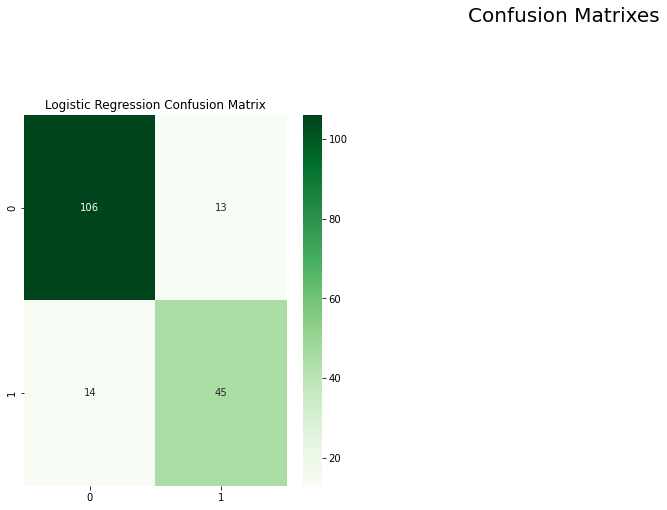

In [74]:
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,cbar=True,annot=True,cmap="Greens",fmt="d")

<AxesSubplot:title={'center':'Decision Tree Confusion Matrix'}>

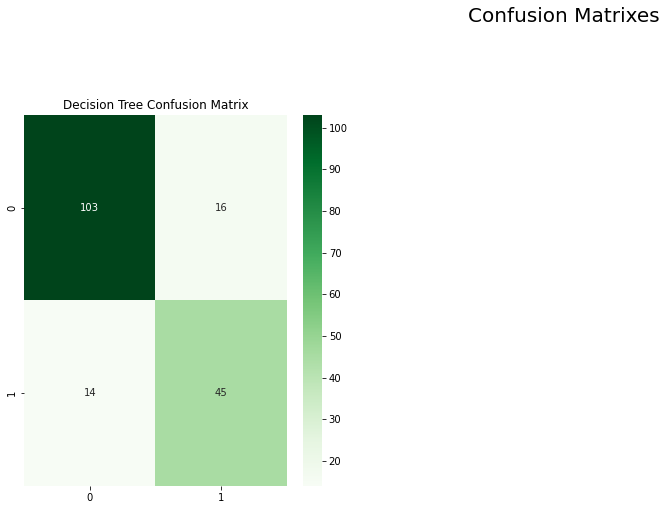

In [87]:
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dt,cbar=True,annot=True,cmap="Greens",fmt="d")

<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}>

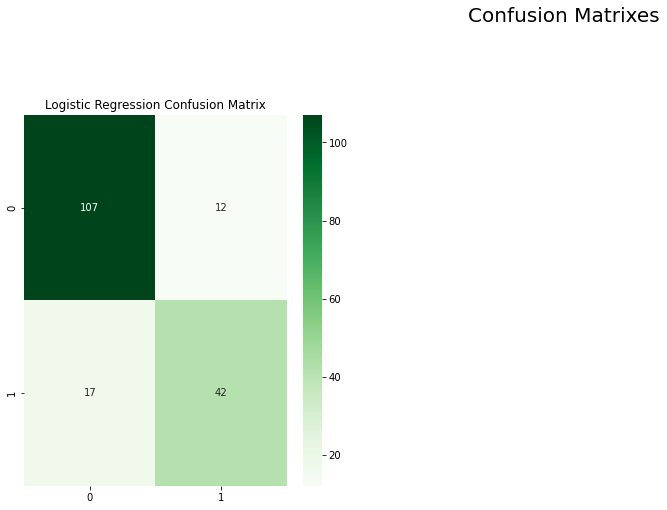

In [82]:
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Radom Forest Confusion Matrix")
sns.heatmap(cm_rf,cbar=True,annot=True,cmap="Greens",fmt="d")

<AxesSubplot:title={'center':'Neural Network Classifier Confusion Matrix'}>

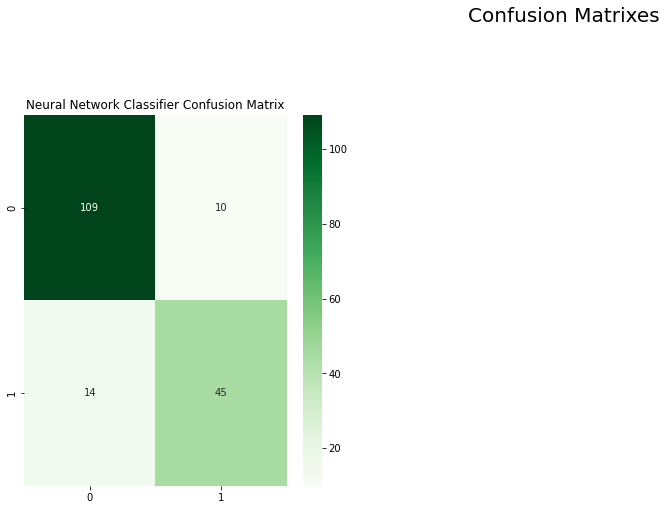

In [89]:
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("Neural Network Classifier Confusion Matrix")
sns.heatmap(cm_nn,cbar=True,annot=True,cmap="Greens",fmt="d")

<AxesSubplot:title={'center':'SVM Classifier Confusion Matrix'}>

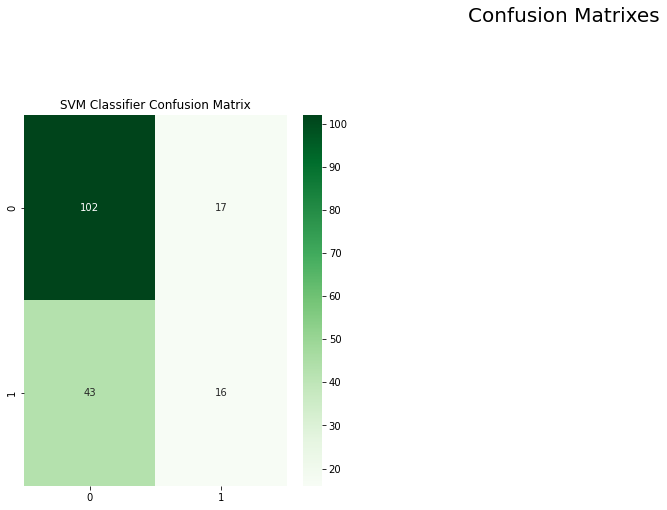

In [94]:
cm_svm
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes",fontsize=20)
plt.subplot(2,3,1)
plt.title("SVM Classifier Confusion Matrix")
sns.heatmap(cm_svm,cbar=True,annot=True,cmap="Greens",fmt="d")